<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [4]:
import pandas as pd

Load the dataset into a dataframe.


In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [6]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

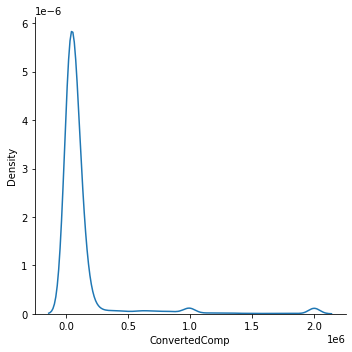

In [7]:
#plotting the distribution curve for ConvertedComp
sns.displot(data = df, x = 'ConvertedComp', kind = "kde")

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

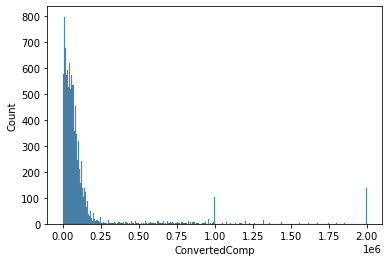

In [8]:
# your code goes here
sns.histplot(data = df, x = 'ConvertedComp')

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
df.ConvertedComp.median()

57745.0

How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
df.Gender.value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
#median ConvertedComp of responders who identify as woman
df.loc[df['Gender'] == 'Woman', ['ConvertedComp']].median()


ConvertedComp    57708.0
dtype: float64

In [12]:
# Another option gives you a broad result
df.groupby('Gender')['ConvertedComp'].median().to_frame()

,ConvertedComp
Gender,
Man,57744.0
"Man;Non-binary, genderqueer, or gender non-conforming",59520.0
"Non-binary, genderqueer, or gender non-conforming",67142.0
Woman,57708.0
Woman;Man,21648.0
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",30244.0
"Woman;Non-binary, genderqueer, or gender non-conforming",65535.5


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [13]:
# your code goes here
#descriptive stats of column Age for broad result
df['Age'].describe().to_frame()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


In [14]:
#other option for specific result is using code below:
import numpy
from numpy import percentile
bet=df.dropna(subset = ['Age'])
data=bet['Age']
quartile = percentile (data, [25,50,75])

data_min, data_max = data.min(), data.max()

print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartile[0])
print('Median: %.3f' % quartile[1])
print('Q3: %.3f' % quartile[2])
print('Max: %.3f' % data_max)

Min: 16.000
Q1: 25.000
Median: 29.000
Q3: 35.000
Max: 99.000


Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

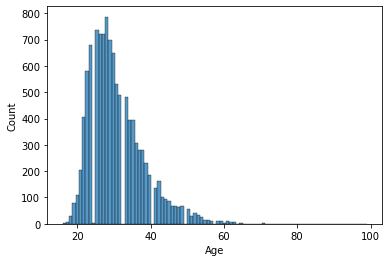

In [47]:
# your code goes here
#plot histogram of Column Age
sns.histplot(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:ylabel='ConvertedComp'>

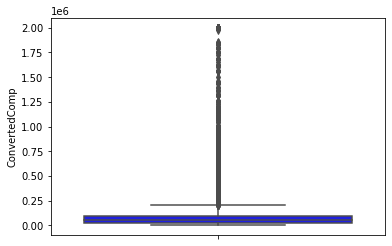

In [15]:
# your code goes here
#plot box plot of Coulumn ConvertedComp and check for outliers
sns.boxplot(y='ConvertedComp', data=df, color='blue')


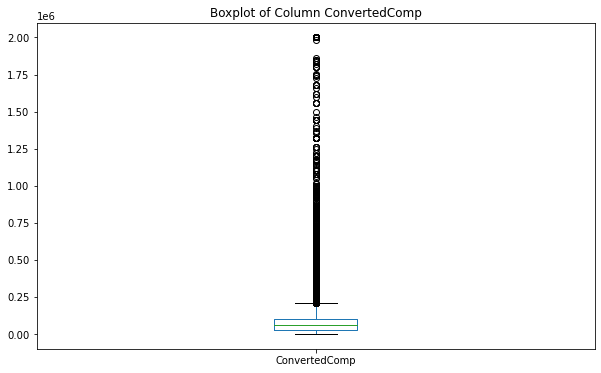

In [16]:
#other option using matplotlib

df.ConvertedComp.plot(kind='box', figsize=(10, 6))

plt.title('Boxplot of Column ConvertedComp')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [17]:
#calculate interquartile range of values in the 'ConvertedComp' column

import numpy as np
#from numpy import percentile

df['ConvertedComp'].describe()

q1 = df['ConvertedComp'].quantile(0.25)

q3 = df['ConvertedComp'].quantile(0.75)

iqr = q3 - q1


print('the interquartile range is:', iqr)


the interquartile range is: 73132.0


Find out the upper and lower bounds.


In [18]:
# your code goes here

#display upper and lower bounds

max_val = df['ConvertedComp'].max()
min_val = df['ConvertedComp'].min()

print('the maximum and minimum bounds are', max_val, 'and', min_val, 'respectively')

the maximum and minimum bounds are 2000000.0 and 0.0 respectively


Identify how many outliers are there in the `ConvertedComp` column.


In [19]:
# your code goes here
#display outliers in ConvertedComp Column

print('outliers below:', df['ConvertedComp'].le(q1 - 1.5*iqr).sum())

print('outliers above:', df['ConvertedComp'].gt(q3 + 1.5*iqr).sum())


outliers below: 0
outliers above: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [23]:
# your code goes here
#display new dataframe after removing outliers
print('the shape of the original dataframe is:', df.shape)

df1 = df[df['ConvertedComp'].le(q3 + 1.5*iqr)]
print('the shape of the new dataframe with outliers removed is:', df1.shape)

mean_after = df1.mean()

print('the mean after removing the outlier is:', mean_after)

the shape of the original dataframe is: (11398, 85)
the shape of the new dataframe with outliers removed is: (9703, 85)
the mean after removing the outlier is: Respondent        12501.007317
CompTotal        724113.931155
ConvertedComp     59883.208389
WorkWeekHrs          41.864782
CodeRevHrs            4.737455
Age                  30.695860
dtype: float64


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [24]:
# your code goes here
#find correlation between age and other columns
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
